## <h1 align="center"> Lingüística Computacional - MIARFID</h1>
## <h1 align="center"> Laboratorio 2 - Etiquetado de secuencias</h1>

# Indicad el nombre de lxs estudiantes que realizan la entrega
# Estudiante 1:
# Estudiante 2:

# Ejercicio 1 - Análisis del corpus Treebank

Analiza el corpus etiquetado Penn Treebank, utilizando el conjunto de etiquetas 'universal' (tagset='universal'). En concreto, se desea…

1.1 Mostrar gráficamente las etiquetas que aparecen y sus frecuencias.

In [1]:
import nltk
nltk.download('treebank')
nltk.download('universal_tagset')
from nltk.corpus import treebank
from nltk.probability import FreqDist

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\shiyi\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\shiyi\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [5]:
sentences = list(treebank.tagged_sents(tagset='universal'))
print(f"Ejemplo de oración etiquetada:\n{sentences[0]}")
print(f"Número de oraciones en el corpus: {len(sentences)}")

Ejemplo de oración etiquetada:
[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')]
Número de oraciones en el corpus: 3914


Tipos de etiquetas: 12
Total de etiquetas: 100676
.: 11715
ADJ: 6397
ADP: 9857
ADV: 3171
CONJ: 2265
DET: 8725
NOUN: 28867
NUM: 3546
PRON: 2737
PRT: 3219
VERB: 13564
X: 6613


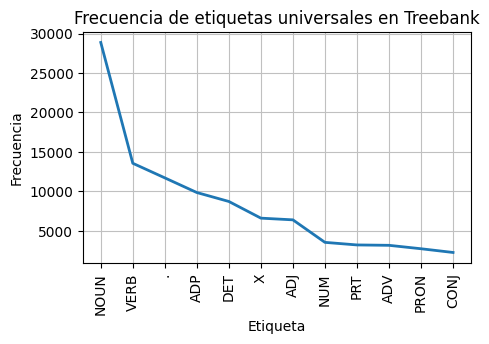

In [12]:
import matplotlib.pyplot as plt

# Extraer todas las etiquetas del corpus
tags = [tag for sent in sentences for (_, tag) in sent]

# Calcular la frecuencia de cada etiqueta
fdist = FreqDist(tags)

print("Tipos de etiquetas:", len(fdist))
print("Total de etiquetas:", len(tags))

# Imprime en orden alfabético
for tag, freq in sorted(fdist.items()):
    print(f"{tag}: {freq}")

# Gráfica de frecuencias
plt.figure(figsize=(5,3))
fdist.plot(title="Samples")
plt.xlabel("Etiqueta")
plt.ylabel("Frecuencia")
plt.show()

1.2 Mostrar cuál es la frecuencia (porcentaje) de aparición de cada una de las etiquetas en el corpus.

In [15]:
# Contar la frecuencia en porcentaje de cada etiqueta gramatical
tags = [tag for sent in sentences for (word, tag) in sent]
fdist = FreqDist(tags)
total_tags = len(tags)
print("Frecuencia de etiquetas en porcentaje:")
for tag, freq in sorted(fdist.items()):
    porcentaje = (freq / total_tags) * 100
    print(f"{tag}: {porcentaje:.2f}%")

Frecuencia de etiquetas en porcentaje:
.: 11.64%
ADJ: 6.35%
ADP: 9.79%
ADV: 3.15%
CONJ: 2.25%
DET: 8.67%
NOUN: 28.67%
NUM: 3.52%
PRON: 2.72%
PRT: 3.20%
VERB: 13.47%
X: 6.57%


1.3 Mostrar las palabras con un grado de ambigüedad mayor que 3; es decir, las palabras que aparecen con más de tres etiquetas asociadas.

In [23]:
# Palabras con más de tres etiquetas asociadas
word_tags = {}
for sent in sentences:
    for word, tag in sent:
        if word.lower() not in word_tags:
            word_tags[word.lower()] = set()
        word_tags[word.lower()].add(tag)


ambiguous_words = {}
for word, tags in word_tags.items():
    if len(tags) > 3:
        ambiguous_words[word] = tags

print('Palabra\tEtiquetas')
for w, tags in sorted(ambiguous_words.items()):
    print(f'{w:>10}\t{tags}')
print('Total de palabras con ambigüedad > 3:', len(ambiguous_words))

Palabra	Etiquetas
         a	{'X', 'DET', 'ADJ', 'ADP', 'NOUN'}
       and	{'CONJ', 'ADP', 'NOUN', 'ADJ'}
      back	{'PRT', 'ADJ', 'ADV', 'NOUN', 'VERB'}
     close	{'ADJ', 'NOUN', 'ADV', 'VERB'}
      down	{'NOUN', 'ADP', 'ADV', 'PRT'}
     first	{'ADJ', 'NOUN', 'ADV', 'NUM'}
      free	{'ADJ', 'NOUN', 'ADV', 'VERB'}
        in	{'NOUN', 'ADV', 'ADP', 'PRT'}
      last	{'ADJ', 'NOUN', 'ADV', 'VERB'}
       off	{'ADJ', 'ADP', 'ADV', 'PRT'}
        on	{'ADV', 'NOUN', 'ADP', 'PRT'}
      over	{'ADJ', 'ADV', 'ADP', 'PRT'}
       the	{'ADJ', 'NOUN', 'NUM', 'DET'}
Total de palabras con ambigüedad > 3: 13


# Ejercicio 2 - TrigramTagger

2.1 Entrena y evalúa un etiquetador basado en trigramas (TrigramTagger) sobre el corpus Penn Treebank utilizando el tagset='universal'. Corpus treebank 90% train - 10% test.

In [26]:
from nltk.tag import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger
from nltk.corpus import treebank

In [29]:
talla = int(len(sentences) * 0.9)
train_sents = sentences[:talla]
test_sents = sentences[talla:]

trigram_tagger = TrigramTagger(train_sents)
sent1=treebank.sents()[talla]
print(sent1)
print(trigram_tagger.tag(sent1))

okUni = round(trigram_tagger.accuracy(test_sents) * 100, 2)
print("Tasa de acierto de Trigramas: "+ str(okUni) + "%")

['Kalamazoo', ',', 'Mich.-based', 'First', 'of', 'America', 'said', '0', 'it', 'will', 'eliminate', 'the', '13', 'management', 'positions', 'of', 'the', 'former', 'Midwest', 'Financial', 'parent', 'company', '.']
[('Kalamazoo', None), (',', None), ('Mich.-based', None), ('First', None), ('of', None), ('America', None), ('said', None), ('0', None), ('it', None), ('will', None), ('eliminate', None), ('the', None), ('13', None), ('management', None), ('positions', None), ('of', None), ('the', None), ('former', None), ('Midwest', None), ('Financial', None), ('parent', None), ('company', None), ('.', None)]
Tasa de acierto de Unigramas: 9.1%


In [30]:
unigram_tagger = UnigramTagger(train_sents)
okUni = round(unigram_tagger.accuracy(test_sents) * 100, 2);
print("Tasa de acierto de Unigramas: "+ str(okUni) + "%")

Tasa de acierto de Unigramas: 88.16%


In [46]:
import pprint
from nltk.corpus import treebank
from nltk.tag import DefaultTagger
from nltk.probability import FreqDist
# calcular la tag más frecuente en el train
tags = []
for sent in sentences:
    for word, tag in sent:
        tags.append(tag)
masFTag = FreqDist(tags).max()
print(masFTag)
default_tagger = DefaultTagger(masFTag)
print(default_tagger.tag(sent1))
okDef = round(default_tagger.accuracy(test_sents) * 100, 2);
print("Tasas de acierto:")
print("Default Tagger: " + str(okDef) + "%")


NOUN
[('Kalamazoo', 'NOUN'), (',', 'NOUN'), ('Mich.-based', 'NOUN'), ('First', 'NOUN'), ('of', 'NOUN'), ('America', 'NOUN'), ('said', 'NOUN'), ('0', 'NOUN'), ('it', 'NOUN'), ('will', 'NOUN'), ('eliminate', 'NOUN'), ('the', 'NOUN'), ('13', 'NOUN'), ('management', 'NOUN'), ('positions', 'NOUN'), ('of', 'NOUN'), ('the', 'NOUN'), ('former', 'NOUN'), ('Midwest', 'NOUN'), ('Financial', 'NOUN'), ('parent', 'NOUN'), ('company', 'NOUN'), ('.', 'NOUN')]
Tasas de acierto:
Default Tagger: 30.36%


In [49]:
unigram_tagger = UnigramTagger(train_sents, backoff = default_tagger)
bigram_tagger = BigramTagger(train_sents, backoff= unigram_tagger)
backoff_tagger = TrigramTagger(train_sents, backoff= bigram_tagger)

In [50]:
okBiBO = round(backoff_tagger.accuracy(test_sents) * 100, 2)
print("Tasa de acierto de Bigramas - backoff: " + str(okBiBO) + "%")

Tasa de acierto de Bigramas - backoff: 94.02%


2.3 Utiliza un modelo de afijos (AffixTagger) para mejorar los resultados. Prueba distintos tamaños de prefijos y sufijos, y escoge el mejor

In [53]:
from nltk.tag import AffixTagger

In [68]:
# Specifying 3 character prefixes
lista = [-4, -3, -2, -1, 0, 1, 2, 3]
mejor = 0
for i in lista:
    prefix_tag = AffixTagger(train_sents,affix_length=i)
    accuracy = round(prefix_tag.accuracy(test_sents)*100,2)
    print ("Tasa de acierto de AffixTagger: ", str(i), " -- ", accuracy, "%")
    unigram_tagger = UnigramTagger(train_sents, backoff = prefix_tag)
    bigram_tagger = BigramTagger(train_sents, backoff= unigram_tagger)
    backoff_tagger = TrigramTagger(train_sents, backoff= bigram_tagger)
    okBiBO = round(backoff_tagger.accuracy(test_sents) * 100, 2)
    if okBiBO > mejor:
        mejor = okBiBO
    print("Tasa de acierto del modelo de Trigramas con tratamiento de afijos:", okBiBO,"%")

Tasa de acierto de AffixTagger:  -4  --  25.85 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 92.1 %
Tasa de acierto de AffixTagger:  -3  --  32.94 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 93.47 %
Tasa de acierto de AffixTagger:  -2  --  39.15 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.32 %
Tasa de acierto de AffixTagger:  -1  --  42.02 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.55 %
Tasa de acierto de AffixTagger:  0  --  73.62 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 88.6 %
Tasa de acierto de AffixTagger:  1  --  43.57 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.35 %
Tasa de acierto de AffixTagger:  2  --  36.44 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.24 %
Tasa de acierto de AffixTagger:  3  --  30.35 %
Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 92.73 %


In [67]:
print("Tasa de acierto del modelo de Trigramas con tratamiento de afijos:",mejor,"%")

Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 94.55 %


2.4 Repite el experimento utilizando el conjunto de etiquetas original de treebank y compara los resultados.

In [81]:
talla = int(len(treebank.tagged_sents()) * 0.9)
train_sents = treebank.tagged_sents()[:talla]
test_sents = treebank.tagged_sents()[talla:]

unigram_tagger = UnigramTagger(train_sents)
sent1=treebank.sents()[talla]
print(sent1)
print(unigram_tagger.tag(sent1))
okBi = round(unigram_tagger.accuracy(test_sents) * 100, 2);
print()
print("Tasas de acierto de Unigramas: " + str(okBi) + "%")

bigram_tagger = BigramTagger(train_sents)
sent1=treebank.sents()[talla]
print(sent1)
print(bigram_tagger.tag(sent1))

okBi = round(bigram_tagger.accuracy(test_sents) * 100, 2)
print()
print("Tasas de acierto de Bigramas: " + str(okBi) + "%")

trigram_tagger = TrigramTagger(train_sents)
sent1=treebank.sents()[talla]
print(sent1)
print(trigram_tagger.tag(sent1))

okUni = round(trigram_tagger.accuracy(test_sents) * 100, 2)
print()
print("Tasa de acierto de Trigramas: "+ str(okUni) + "%")

['Kalamazoo', ',', 'Mich.-based', 'First', 'of', 'America', 'said', '0', 'it', 'will', 'eliminate', 'the', '13', 'management', 'positions', 'of', 'the', 'former', 'Midwest', 'Financial', 'parent', 'company', '.']
[('Kalamazoo', None), (',', ','), ('Mich.-based', None), ('First', 'NNP'), ('of', 'IN'), ('America', 'NNP'), ('said', 'VBD'), ('0', '-NONE-'), ('it', 'PRP'), ('will', 'MD'), ('eliminate', 'VB'), ('the', 'DT'), ('13', 'CD'), ('management', 'NN'), ('positions', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('former', 'JJ'), ('Midwest', 'NNP'), ('Financial', 'NNP'), ('parent', 'NN'), ('company', 'NN'), ('.', '.')]

Tasas de acierto de Unigramas: 86.28%
['Kalamazoo', ',', 'Mich.-based', 'First', 'of', 'America', 'said', '0', 'it', 'will', 'eliminate', 'the', '13', 'management', 'positions', 'of', 'the', 'former', 'Midwest', 'Financial', 'parent', 'company', '.']
[('Kalamazoo', None), (',', None), ('Mich.-based', None), ('First', None), ('of', None), ('America', None), ('said', None), ('0',

In [84]:
tags = [tag for (word, tag) in treebank.tagged_words()]
masFTag = FreqDist(tags).max()
print(masFTag)
default_tagger = DefaultTagger(masFTag)
print(default_tagger.tag(sent1))
okDef = round(default_tagger.accuracy(test_sents) * 100, 2)
print("Tasas de acierto:")
print("Default Tagger: " + str(okDef) + "%")


NN
[('Kalamazoo', 'NN'), (',', 'NN'), ('Mich.-based', 'NN'), ('First', 'NN'), ('of', 'NN'), ('America', 'NN'), ('said', 'NN'), ('0', 'NN'), ('it', 'NN'), ('will', 'NN'), ('eliminate', 'NN'), ('the', 'NN'), ('13', 'NN'), ('management', 'NN'), ('positions', 'NN'), ('of', 'NN'), ('the', 'NN'), ('former', 'NN'), ('Midwest', 'NN'), ('Financial', 'NN'), ('parent', 'NN'), ('company', 'NN'), ('.', 'NN')]
Tasas de acierto:
Default Tagger: 14.7%


In [85]:
unigram_tagger = UnigramTagger(train_sents, backoff = default_tagger)
bigram_tagger = BigramTagger(train_sents, backoff= unigram_tagger)
backoff_tagger = TrigramTagger(train_sents, backoff= bigram_tagger)

resultado = round(bigram_tagger.accuracy(test_sents) * 100, 2)
print("Etiquetas originales. Tasa de acierto de Bigramas - backoff:", resultado,"%")

resultado = round(backoff_tagger.accuracy(test_sents) * 100, 2)
print("Etiquetas originales. Tasa de acierto de Trigramas - backoff:", resultado,"%")

prefix_tag = AffixTagger(train_sents,affix_length=-1)
accuracy = round(prefix_tag.accuracy(test_sents)*100,2)
unigram_tagger = UnigramTagger(train_sents, backoff = prefix_tag)
bigram_tagger = BigramTagger(train_sents, backoff= unigram_tagger)
backoff_tagger = TrigramTagger(train_sents, backoff= bigram_tagger)
okBiBO = round(backoff_tagger.accuracy(test_sents) * 100, 2)
print("Etiquetas originales. Tasa de acierto del modelo de Trigramas con tratamiento de afijos:", okBiBO,"%")

Etiquetas originales. Tasa de acierto de Bigramas - backoff: 89.06 %
Etiquetas originales. Tasa de acierto de Trigramas - backoff: 88.99 %
Etiquetas originales. Tasa de acierto del modelo de Trigramas con tratamiento de afijos: 91.11 %


# Ejercicio 3: efectos del tamaño del corpus de entranamiento

Los etiquetadores basados en sistemas de aprendizaje necesitan de un conjunto de datos de entrenamiento mínimo para aprender modelos que ofrezcan un desempeño aceptable. En esta tarea se trata de mostrar la evolución de la precisión de un etiquetador conforme aumenta el tamaño del corpus de entrenamiento.
Para ello tenga en cuenta las siguientes consideraciones:
- El corpus se dividirá en dos particiones: 90% para training y 10% para test (las mismas particiones utilizadas en ejercicios anteriores).
- La partición de training se dividirá a su vez en 10 partes iguales.
- Deberá realizar 10 iteraciones empezando con la partición de training 1, y sumando en cada una de ellas una partición al corpus de entrenamiento.
- En cada iteración se entrenará y evaluará el etiquetador obteniendo la correspondiente precisión.
- Finalmente se representará gráficamente la evolución de la precisión en cada iteración.



3.1 Realice el experimento para el corpus treebank con el conjunto de etiquetas universal, utilizando el modelo de bigramas y de trigramas suavizados con backoff y Default Tagger.

In [96]:
sentences = list(treebank.tagged_sents(tagset='universal'))
talla = int(len(sentences) * 0.9)
train_sents = sentences[:talla]
test_sents = sentences[talla:]

# Dividir el train en 10 particiones iguales
part_size = len(train_sents) // 10
bigram_scores = []
trigram_scores = []

for i in range(1, 11):
    current_train = train_sents[:i * part_size] if i < 10 else train_sents
    # DefaultTagger con la etiqueta más frecuente
    tags = [tag for sent in current_train for (_, tag) in sent]
    masFTag = FreqDist(tags).max()
    default_tagger = DefaultTagger(masFTag)
    unigram_tagger = UnigramTagger(current_train, backoff=default_tagger)
    bigram_tagger = BigramTagger(current_train, backoff=unigram_tagger)
    trigram_tagger = TrigramTagger(current_train, backoff=bigram_tagger)

    bigram_acc = round(bigram_tagger.accuracy(test_sents) * 100, 2)
    trigram_acc = round(trigram_tagger.accuracy(test_sents) * 100, 2)
    bigram_scores.append(bigram_acc)
    trigram_scores.append(trigram_acc)
    print(f"Partición {i}: Bigramas - backoff: {bigram_acc}%")
    print(f"Partición {i}: Trigramas - backoff: {trigram_acc}%")

Partición 1: Bigramas - backoff: 87.61%
Partición 1: Trigramas - backoff: 87.54%
Partición 2: Bigramas - backoff: 89.82%
Partición 2: Trigramas - backoff: 89.8%
Partición 3: Bigramas - backoff: 90.62%
Partición 3: Trigramas - backoff: 90.62%
Partición 3: Bigramas - backoff: 90.62%
Partición 3: Trigramas - backoff: 90.62%
Partición 4: Bigramas - backoff: 91.58%
Partición 4: Trigramas - backoff: 91.59%
Partición 4: Bigramas - backoff: 91.58%
Partición 4: Trigramas - backoff: 91.59%
Partición 5: Bigramas - backoff: 92.08%
Partición 5: Trigramas - backoff: 92.1%
Partición 5: Bigramas - backoff: 92.08%
Partición 5: Trigramas - backoff: 92.1%
Partición 6: Bigramas - backoff: 92.59%
Partición 6: Trigramas - backoff: 92.6%
Partición 6: Bigramas - backoff: 92.59%
Partición 6: Trigramas - backoff: 92.6%
Partición 7: Bigramas - backoff: 93.23%
Partición 7: Trigramas - backoff: 93.18%
Partición 7: Bigramas - backoff: 93.23%
Partición 7: Trigramas - backoff: 93.18%
Partición 8: Bigramas - backoff: 

3.2 Realice el mismo experimento con el juego de etiquetas original del corpus.

In [97]:
sentences = list(treebank.tagged_sents())
talla = int(len(sentences) * 0.9)
train_sents = sentences[:talla]
test_sents = sentences[talla:]

# Dividir el train en 10 particiones iguales
part_size = len(train_sents) // 10
bigram_scores_originales = []
trigram_scores_originales = []

for i in range(1, 11):
    current_train = train_sents[:i * part_size] if i < 10 else train_sents
    # DefaultTagger con la etiqueta más frecuente
    tags = [tag for sent in current_train for (_, tag) in sent]
    masFTag = FreqDist(tags).max()
    default_tagger = DefaultTagger(masFTag)
    unigram_tagger = UnigramTagger(current_train, backoff=default_tagger)
    bigram_tagger = BigramTagger(current_train, backoff=unigram_tagger)
    trigram_tagger = TrigramTagger(current_train, backoff=bigram_tagger)

    bigram_acc = round(bigram_tagger.accuracy(test_sents) * 100, 2)
    trigram_acc = round(trigram_tagger.accuracy(test_sents) * 100, 2)
    bigram_scores_originales.append(bigram_acc)
    trigram_scores_originales.append(trigram_acc)
    print(f"Partición {i}: Bigramas - backoff: {bigram_acc}%")
    print(f"Partición {i}: Trigramas - backoff: {trigram_acc}%")

Partición 1: Bigramas - backoff: 76.68%
Partición 1: Trigramas - backoff: 76.65%
Partición 2: Bigramas - backoff: 80.25%
Partición 2: Trigramas - backoff: 80.15%
Partición 3: Bigramas - backoff: 82.27%
Partición 3: Trigramas - backoff: 82.24%
Partición 2: Bigramas - backoff: 80.25%
Partición 2: Trigramas - backoff: 80.15%
Partición 3: Bigramas - backoff: 82.27%
Partición 3: Trigramas - backoff: 82.24%
Partición 4: Bigramas - backoff: 84.24%
Partición 4: Trigramas - backoff: 84.19%
Partición 4: Bigramas - backoff: 84.24%
Partición 4: Trigramas - backoff: 84.19%
Partición 5: Bigramas - backoff: 85.18%
Partición 5: Trigramas - backoff: 85.08%
Partición 5: Bigramas - backoff: 85.18%
Partición 5: Trigramas - backoff: 85.08%
Partición 6: Bigramas - backoff: 86.26%
Partición 6: Trigramas - backoff: 86.14%
Partición 6: Bigramas - backoff: 86.26%
Partición 6: Trigramas - backoff: 86.14%
Partición 7: Bigramas - backoff: 87.08%
Partición 7: Trigramas - backoff: 86.97%
Partición 7: Bigramas - back

3.3 Represente gráficamente el resultado en una gráfica donde el eje x representa el número de oraciones de entrenamiento (talla) y el eje y la precisión del etiquetador.

Para realizar una gráfica puede utilizar pyplot. En la red encontrará tutoriales de uso de la librería. Este es un ejemplo básico de uso:




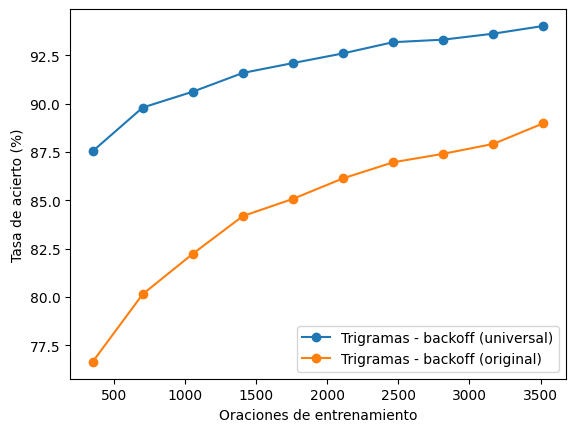

In [103]:
oraciones = [i * part_size for i in range(1, 11)]
plt.plot(oraciones, trigram_scores, marker='o', label='Trigramas - backoff (universal)')
plt.plot(oraciones, trigram_scores_originales, marker='o', label='Trigramas - backoff (original)')
plt.xlabel('Oraciones de entrenamiento')
plt.ylabel('Tasa de acierto (%)')
plt.legend()
plt.show()